In [222]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('NVDA_Revenue_Prediction_Data.csv')
dataset.dropna(axis=1,how='all',inplace=True)
dataset["year-quarter"] = dataset["year-quarter"].str.replace("-", "Q")
dataset["year-quarter"] = pd.to_datetime(dataset["year-quarter"]).dt.to_period('Q')
dataset

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,NaN
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,NaN
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,NaN
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,NaN
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,NaN
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,NaN
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.0
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.0
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.0
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.0


In [223]:
import yfinance as yf
msft = yf.Ticker("msft").quarterly_cashflow.T
print(msft.columns)
msft = msft[["Net PPE Purchase And Sale"]]/-1000000
msft = msft.reset_index().rename(columns={"index":"year-quarter"})
msft

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure',
       'End Cash Position', 'Beginning Cash Position',
       'Effect Of Exchange Rate Changes', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Cash Dividends Paid',
       'Common Stock Dividend Paid', 'Net Common Stock Issuance',
       'Common Stock Payments', 'Common Stock Issuance',
       'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance',
       'Short Term Debt Issuance', 'Net Long Term Debt Issuance',
       'Long Term Debt Payments', 'Long Term Debt Issuance',
       'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business Purchase And Sale', 'Purchase Of Bu

,year-quarter,Net PPE Purchase And Sale
0,2024-06-30,13873.0
1,2024-03-31,10952.0
2,2023-12-31,9735.0
3,2023-09-30,9917.0
4,2023-06-30,8943.0
5,2023-03-31,NaN


In [224]:
# transform year-quarter datetime to year-quarter format
msft['year-quarter'] = pd.to_datetime(msft['year-quarter'])
msft['year-quarter'] = msft['year-quarter'].dt.to_period('Q')
msft

,year-quarter,Net PPE Purchase And Sale
0,2024Q2,13873.0
1,2024Q1,10952.0
2,2023Q4,9735.0
3,2023Q3,9917.0
4,2023Q2,8943.0
5,2023Q1,NaN


In [225]:
merge_df = pd.merge(dataset, msft, how='outer', on='year-quarter')
merge_df["MSFT"].fillna(merge_df["Net PPE Purchase And Sale"], inplace=True)
merge_df = merge_df.drop(columns=["Net PPE Purchase And Sale"])
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,NaN
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,NaN
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,NaN
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,NaN
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,NaN
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,NaN
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.0
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.0
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.0
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.0


In [244]:
amazon_fullfillment_center = yf.Ticker("AMZN").quarterly_cashflow.T

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Capital Expenditure',
       'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
       'End Cash Position', 'Beginning Cash Position',
       'Effect Of Exchange Rate Changes', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Net Common Stock Issuance',
       'Common Stock Payments', 'Net Issuance Payments Of Debt',
       'Net Short Term Debt Issuance', 'Short Term Debt Payments',
       'Short Term Debt Issuance', 'Net Long Term Debt Issuance',
       'Long Term Debt Payments', 'Long Term Debt Issuance',
       'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities',
       'Net Investment Purchase And Sale', 'Sale Of Investment',
       'Purchase Of Investment', 'Net Business Purchase And Sale',
       'Purchase Of Business', 'Net PPE Purchase And Sale', 

In [226]:
second_dataframe = yf.Ticker("amzn").quarterly_cashflow.T
second_dataframe = second_dataframe[["Net PPE Purchase And Sale"]]/-1000000
second_dataframe = second_dataframe.reset_index().rename(columns={"index":"year-quarter"})

second_dataframe['year-quarter'] = second_dataframe['year-quarter'].dt.to_period('Q')
second_dataframe

,year-quarter,Net PPE Purchase And Sale
0,2024Q2,16393.0
1,2024Q1,13935.0
2,2023Q4,13353.0
3,2023Q3,11298.0
4,2023Q2,10412.0
5,2023Q1,NaN


In [227]:
def fill_last_quarter(df, stock: str):
    second_dataframe = yf.Ticker(f"{stock}").quarterly_cashflow.T
    second_dataframe = second_dataframe[["Net PPE Purchase And Sale"]]/-1000000
    second_dataframe = second_dataframe.reset_index().rename(columns={"index":"year-quarter"})

    second_dataframe['year-quarter'] = second_dataframe['year-quarter'].dt.to_period('Q')

    merge_df = pd.merge(df, second_dataframe, how='outer', on='year-quarter')

    stock = stock.upper()
    merge_df[f"{stock}"].fillna(merge_df["Net PPE Purchase And Sale"], inplace=True)
    merge_df = merge_df.drop(columns=["Net PPE Purchase And Sale"])
    return merge_df

merge_df = fill_last_quarter(merge_df, "amzn")
merge_df = fill_last_quarter(merge_df, "goog")
merge_df = fill_last_quarter(merge_df, "meta")
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,NaN
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,NaN
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,NaN
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,NaN
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,NaN
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,NaN
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.0
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.0
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.0
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.0


In [228]:
def fill_nan_with_average(col):
    non_nan_values = col.dropna()[:4]  # Get the first 4 non-NaN values
    if len(non_nan_values) == 0:
        return col  # If there are no non-NaN values, return the column as it is
    average_value = non_nan_values.mean()  # Calculate the average
    return col.fillna(average_value)  # Fill NaN values with the calculated average

# Apply the function to each column
merge_df["TSMC-Revenue"] = fill_nan_with_average(merge_df["TSMC-Revenue"])
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,307894.25
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,307894.25
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,307894.25
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,307894.25
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,307894.25
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,307894.25
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.00
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.00
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.00
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.00


In [229]:
merge_df["SMCI"].fillna(5310.0, inplace=True)
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,307894.25
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,307894.25
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,307894.25
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,307894.25
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,307894.25
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,307894.25
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.00
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.00
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.00
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.00


In [230]:
from sklearn.linear_model import LinearRegression

test_set_row_len = 1
max_row_number = len(merge_df)
test_set_row_number = max_row_number - 1
print(f'Test set row number: {test_set_row_number}')
print(f'Max row number: {max_row_number}')
pred_row_number = test_set_row_number
max_train_row_number = test_set_row_number-test_set_row_len
print(f'Max train row number: {max_train_row_number}')
print(f'Pred row number: {pred_row_number}')

X = merge_df.drop(columns=["NVDA", "year-quarter"])

X_train = X.iloc[:max_train_row_number]
y_train = merge_df["NVDA"].iloc[:max_train_row_number]

X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = merge_df["NVDA"].iloc[max_train_row_number:test_set_row_number]

X_pred = X.iloc[pred_row_number:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(f'Predicted (Row 24): {y_pred_test}, Actual: {y_test.to_numpy()}')

y_pred_next = model.predict(X_pred)[0]


print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')

# Predicted (Row 24): 24875.60125209669, Actual: 26044.0


Test set row number: 25
Max row number: 26
Max train row number: 24
Pred row number: 25
Predicted (Row 24): [25975.20273067], Actual: [26044.]
Predicted NVIDIA Revenue for Row 25: 34390.06653100914


In [231]:
import numpy as np
absolute_error = np.mean(abs(y_test - y_pred_test))
absolute_error

np.float64(68.79726932576887)

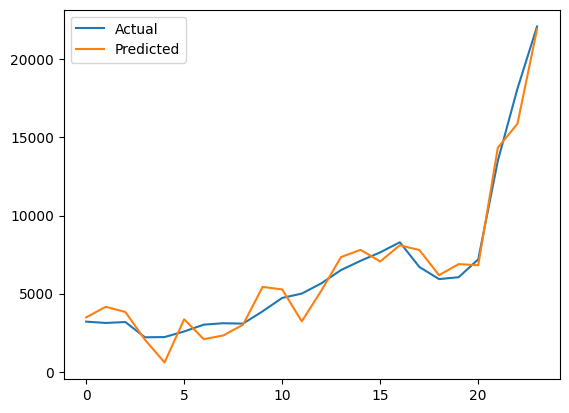

In [232]:
# plot the actual vs predicted values for training data
import matplotlib.pyplot as plt

pred_train = model.predict(X_train)

plt.plot(y_train.to_numpy(), label='Actual')
plt.plot(pred_train, label='Predicted')
plt.legend()
plt.show()


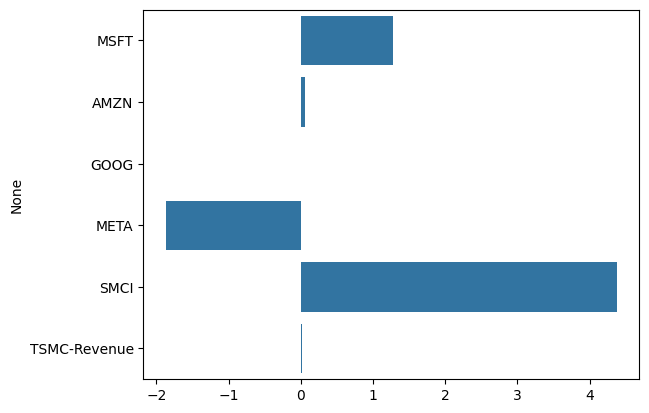

In [233]:
import seaborn as sns

# plot feature Coefficients with seaborn
importance = model.coef_

sns.barplot(x=importance, y=X.columns)
plt.show()


In [242]:
from sklearn.linear_model import LinearRegression

test_set_row_len = 1
max_row_number = len(merge_df)
test_set_row_number = max_row_number - 1
print(f'Test set row number: {test_set_row_number}')
print(f'Max row number: {max_row_number}')
pred_row_number = test_set_row_number
max_train_row_number = test_set_row_number-test_set_row_len
print(f'Max train row number: {max_train_row_number}')
print(f'Pred row number: {pred_row_number}')

X = merge_df.drop(columns=["NVDA", "year-quarter"])

X_train = X.iloc[20:max_train_row_number]
y_train = merge_df["NVDA"].iloc[20:max_train_row_number]

X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = merge_df["NVDA"].iloc[max_train_row_number:test_set_row_number]

X_pred = X.iloc[pred_row_number:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(f'Predicted (Row 24): {y_pred_test}, Actual: {y_test.to_numpy()}')

y_pred_next = model.predict(X_pred)[0]


print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')

# Predicted (Row 24): 24875.60125209669, Actual: 26044.0


Test set row number: 25
Max row number: 26
Max train row number: 24
Pred row number: 25
Predicted (Row 24): [22462.94820618], Actual: [26044.]
Predicted NVIDIA Revenue for Row 25: 29277.559854325067


In [235]:
merge_df

,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,307894.25
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,307894.25
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,307894.25
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,307894.25
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,307894.25
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,307894.25
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.00
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.00
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.00
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.00


In [236]:
chatgpt_appearance_quarter = pd.Period("2022Q4")
chatgpt_appearance_quarter

Period('2022Q4', 'Q-DEC')

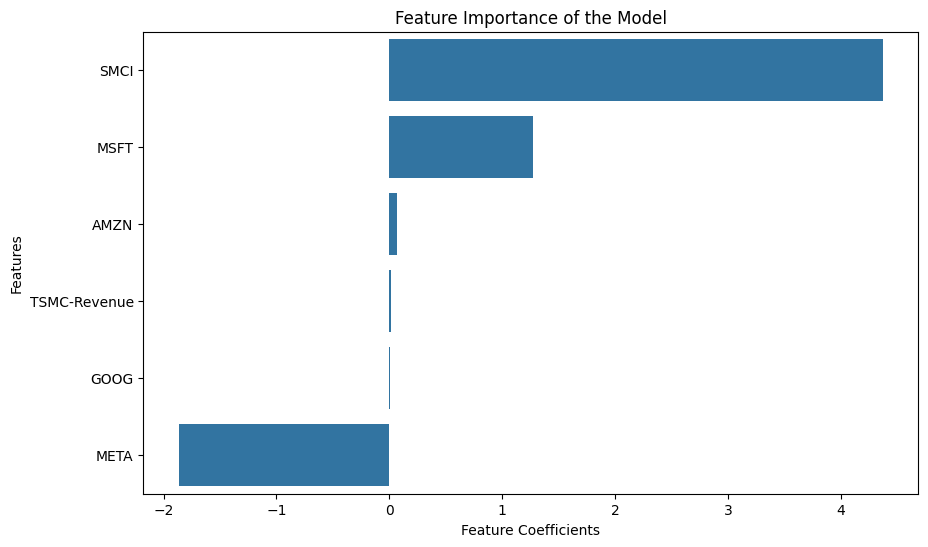

In [237]:
# plot feature importance

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.coef_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Feature Importance of the Model')
plt.show()

In [238]:
original_features = merge_df.drop(columns=["NVDA", "year-quarter"]).columns
original_features

for feature in original_features:
    merge_df[feature] = fill_nan_with_average(merge_df[feature])
    # chatgpt_excess_revenue_compared or revenue to average from previous year
    merge_df[f"{feature}-excess-feature"] = 0
    avg_1_year_feature_before_gpt = merge_df[
        merge_df["year-quarter"] <= chatgpt_appearance_quarter
    ].iloc[-4:][feature].mean()
    print(f"Average of {feature} before GPT: {avg_1_year_feature_before_gpt}")
    merge_df[f"{feature}-excess-feature"] = np.where(merge_df["year-quarter"] > chatgpt_appearance_quarter, merge_df[feature] - merge_df[feature].mean(), 0)

    # remaining feature after subtracting the excess feature

    merge_df[f"{feature}-remaining-feature"] = merge_df[feature] - merge_df[f"{feature}-excess-feature"]
    



merge_df

Average of MSFT before GPT: 6169.5
Average of AMZN before GPT: 14580.25
Average of GOOG before GPT: 7871.25
Average of META before GPT: 7796.5
Average of SMCI before GPT: 1661.25
Average of TSMC-Revenue before GPT: 565973.0


,year-quarter,MSFT,AMZN,GOOG,NVDA,META,SMCI,TSMC-Revenue,MSFT-excess-feature,MSFT-remaining-feature,AMZN-excess-feature,AMZN-remaining-feature,GOOG-excess-feature,GOOG-remaining-feature,META-excess-feature,META-remaining-feature,SMCI-excess-feature,SMCI-remaining-feature,TSMC-Revenue-excess-feature,TSMC-Revenue-remaining-feature
0,2018Q1,2993.0,2727.0,7269.0,3207.0,2812.0,835.0,307894.25,0.000000,2993.000000,0.000000,2727.000000,0.000000,7269.000000,0.000000,2812.000000,0.000000,835.000000,0.00,307894.25
1,2018Q2,3980.0,2949.0,5507.0,3123.0,3460.0,981.0,307894.25,0.000000,3980.000000,0.000000,2949.000000,0.000000,5507.000000,0.000000,3460.000000,0.000000,981.000000,0.00,307894.25
2,2018Q3,3602.0,2537.0,5282.0,3181.0,3342.0,971.0,307894.25,0.000000,3602.000000,0.000000,2537.000000,0.000000,5282.000000,0.000000,3342.000000,0.000000,971.000000,0.00,307894.25
3,2018Q4,3707.0,3120.0,7081.0,2205.0,4301.0,931.0,307894.25,0.000000,3707.000000,0.000000,3120.000000,0.000000,7081.000000,0.000000,4301.000000,0.000000,931.000000,0.00,307894.25
4,2019Q1,2565.0,2721.0,4638.0,2220.0,3837.0,743.0,307894.25,0.000000,2565.000000,0.000000,2721.000000,0.000000,4638.000000,0.000000,3837.000000,0.000000,743.000000,0.00,307894.25
5,2019Q2,4051.0,2643.0,6126.0,2579.0,3633.0,854.0,307894.25,0.000000,4051.000000,0.000000,2643.000000,0.000000,6126.000000,0.000000,3633.000000,0.000000,854.000000,0.00,307894.25
6,2019Q3,3385.0,3385.0,-10764.0,3014.0,3532.0,799.0,293045.00,0.000000,3385.000000,0.000000,3385.000000,0.000000,-10764.000000,0.000000,3532.000000,0.000000,799.000000,0.00,293045.00
7,2019Q4,3545.0,3940.0,23548.0,3105.0,4100.0,870.0,317237.00,0.000000,3545.000000,0.000000,3940.000000,0.000000,23548.000000,0.000000,4100.000000,0.000000,870.000000,0.00,317237.00
8,2020Q1,3767.0,5428.0,6005.0,3080.0,3558.0,772.0,310597.00,0.000000,3767.000000,0.000000,5428.000000,0.000000,6005.000000,0.000000,3558.000000,0.000000,772.000000,0.00,310597.00
9,2020Q2,4744.0,6614.0,5391.0,3866.0,3255.0,896.0,310698.00,0.000000,4744.000000,0.000000,6614.000000,0.000000,5391.000000,0.000000,3255.000000,0.000000,896.000000,0.00,310698.00


In [239]:
excess_features = [f"{feature}-excess-feature" for feature in original_features]
remaining_features = [f"{feature}-remaining-feature" for feature in original_features]

y = merge_df["NVDA"]

X = merge_df[excess_features+remaining_features]
X_train = X.iloc[:max_train_row_number]
y_train = y.iloc[:max_train_row_number]
X_test = X.iloc[max_train_row_number:test_set_row_number]
y_test = y.iloc[max_train_row_number:test_set_row_number]
X_pred = X.iloc[pred_row_number:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(f'Predicted (Row 24): {y_pred_test}, Actual: {y_test.to_numpy()}')

y_pred_next = model.predict(X_pred)[0]

print(f'Predicted NVIDIA Revenue for Row 25: {y_pred_next}')

absolute_error = np.mean(abs(y_test - y_pred_test))
absolute_error

Predicted (Row 24): [22488.85829542], Actual: [26044.]
Predicted NVIDIA Revenue for Row 25: 29782.53701305869


np.float64(3555.141704576159)

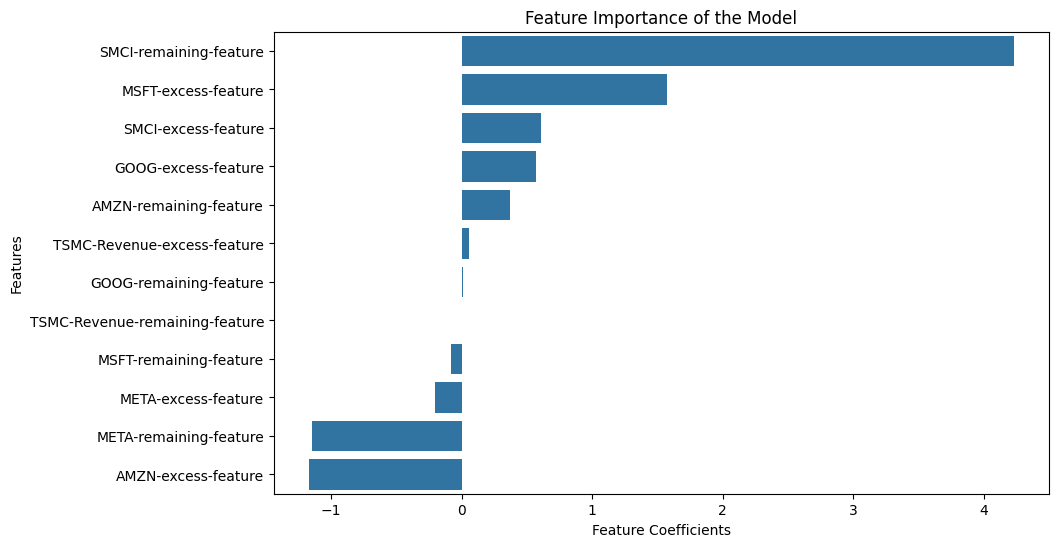

In [240]:
# plot feature importance

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.coef_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Coefficients')
plt.ylabel('Features')
plt.title('Feature Importance of the Model')
plt.show()